In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('C:\\Users\\shree\\Downloads\\spam_dataset.csv',encoding="ISO-8859-1")
data.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       5572 non-null   object
 1   Text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
data["Label"].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
data=data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],axis=1)
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
from nltk import stem
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

def eda_process(msg):
    msg = msg.lower()
    msg = [word for word in msg.split() if word not in stopwords]
    msg = " ".join([stemmer.stem(word) for word in msg])
    return msg


In [6]:
data['Label'].apply(eda_process)
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) 
X = tfidf_vectorizer.fit_transform(data['Text']).toarray()
y = data['Label']

In [8]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9682051282051282
Test Accuracy: 0.9671052631578947


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
class_labels = label_encoder.classes_
print(class_labels)


['ham' 'spam']


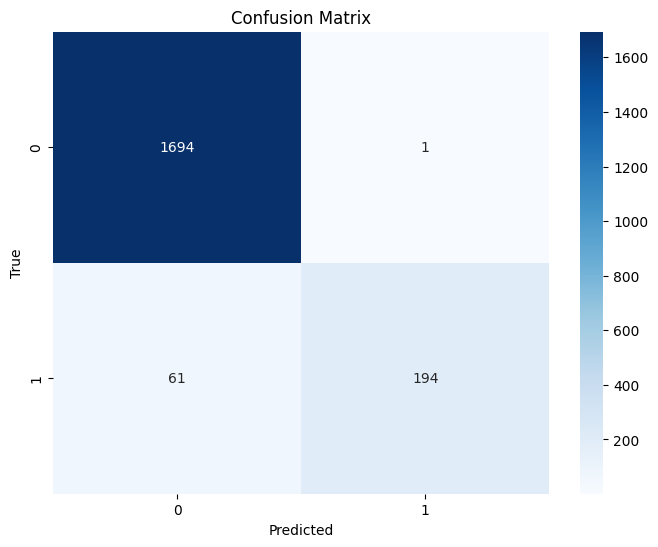

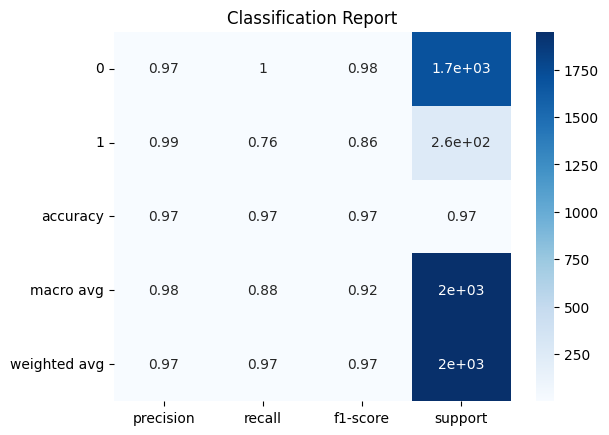

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def plot_classification_report(y_true, y_pred, labels):
    clf_report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).T, annot=True, cmap="Blues")
    plt.title("Classification Report")
    plt.show()

def plot_f1_score(y_true, y_pred, labels):
    f1_scores = f1_score(y_true, y_pred, average=None, labels=labels)
    plt.bar(labels, f1_scores, color='blue')
    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title('F1 Score per Class')
    plt.show()

y_val_pred = model.predict(X_val)
class_labels = [0,1]
plot_confusion_matrix(y_val, y_val_pred, labels=class_labels)
plot_classification_report(y_val, y_val_pred, labels=class_labels)



In [12]:
import pickle 
fileBOW='bow.pkl'
pickle.dump(tfidf_vectorizer, open(fileBOW,'wb'))
fileModel='model.pkl'
pickle.dump(model, open(fileModel,'wb'))